https://github.com/fastai/fastai/blob/master/courses/dl1/lesson5-movielens.ipynb

In [0]:
!pip install fastai==0.7.0

    100% |████████████████████████████████| 122kB 2.0MB/s 
    100% |████████████████████████████████| 496.4MB 32kB/s 
    100% |████████████████████████████████| 184kB 28.2MB/s 
    100% |████████████████████████████████| 2.2MB 5.1MB/s 
    100% |████████████████████████████████| 1.5MB 8.7MB/s 
    100% |████████████████████████████████| 61kB 23.4MB/s 
    100% |████████████████████████████████| 3.6MB 4.7MB/s 
    100% |████████████████████████████████| 112kB 29.2MB/s 
    100% |████████████████████████████████| 122kB 31.2MB/s 
    100% |████████████████████████████████| 71kB 21.5MB/s 
    100% |████████████████████████████████| 92kB 29.8MB/s 
    100% |████████████████████████████████| 122kB 29.2MB/s 
    100% |████████████████████████████████| 11.6MB 2.4MB/s 
    100% |████████████████████████████████| 61kB 23.7MB/s 
    100% |████████████████████████████████| 81kB 21.5MB/s 
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / 

In [0]:
!pip install torchtext==0.2.3

    100% |████████████████████████████████| 51kB 993kB/s 
  Running setup.py bdist_wheel for torchtext ... - done
  Stored in directory: /root/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
Successfully built torchtext
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.learner import *
from fastai.column_data import *

In [0]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2018-11-11 14:58:06--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.34.235
Connecting to files.grouplens.org (files.grouplens.org)|128.101.34.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K   958KB/s    in 1.0s    

2018-11-11 14:58:08 (958 KB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [0]:
import zipfile

zip_ref = zipfile.ZipFile('ml-latest-small.zip', 'r')
zip_ref.extractall('sample_data/')
zip_ref.close()

In [0]:
path='sample_data/ml-latest-small/'

In [0]:
ratings = pd.read_csv(path+'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
movies = pd.read_csv(path+'movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
g=ratings.groupby('userId')['rating'].count()
topUsers=g.sort_values(ascending=False)[:15]

g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False)[:15]

top_r = ratings.join(topUsers, rsuffix='_r', how='inner', on='userId')
top_r = top_r.join(topMovies, rsuffix='_r', how='inner', on='movieId')

pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,1,50,110,260,296,318,356,480,527,589,593,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,
68,2.5,3.0,2.5,5.0,2.0,3.0,3.5,3.5,4.0,3.5,3.5,5.0,4.5,5.0,2.5
182,4.0,4.5,3.5,3.5,5.0,4.5,5.0,3.5,4.0,2.0,4.5,3.0,5.0,5.0,5.0
249,4.0,4.0,5.0,5.0,4.0,4.5,4.5,4.0,4.5,4.0,4.0,5.0,5.0,4.5,5.0
274,4.0,4.0,4.5,3.0,5.0,4.5,4.5,3.5,4.0,4.5,4.0,4.5,4.0,5.0,5.0
288,4.5,NaN,5.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,4.5,3.0,NaN,3.5
307,4.0,4.5,3.5,3.5,4.5,4.5,4.0,3.5,4.5,2.5,4.5,3.0,3.5,4.0,4.0
380,5.0,4.0,4.0,5.0,5.0,3.0,5.0,5.0,NaN,5.0,5.0,5.0,4.5,NaN,4.0
387,NaN,4.5,3.5,4.5,5.0,3.5,4.0,3.0,NaN,3.5,4.0,4.5,4.0,4.5,4.5
414,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0


In [0]:
val_idxs = get_cv_idxs(len(ratings))
wd=2e-4
n_factors = 50

In [0]:
cf = CollabFilterDataset.from_csv(path, 'ratings.csv', 'userId', 'movieId', 'rating')
learn = cf.get_learner(n_factors, val_idxs, 64, opt_fn=optim.Adam)

In [0]:
learn.fit(1e-2, 2, wds=wd, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   
    0      0.760271   0.776107  
    1      0.737875   0.755623  
    2      0.595258   0.739023  



[array([0.73902])]

In [0]:
math.sqrt(0.776)

0.8809086218218096

In [0]:
preds = learn.predict()

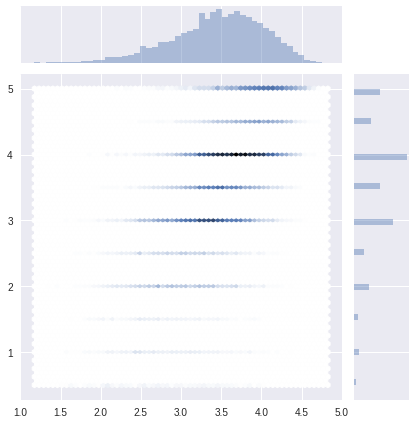

In [0]:
y=learn.data.val_y
sns.jointplot(preds, y, kind='hex', stat_func=None);

In [0]:
movie_names = movies.set_index('movieId')['title'].to_dict()
g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False).index.values[:3000]
topMovieIdx = np.array([cf.item2idx[o] for o in topMovies])

In [0]:
m=learn.model; m.cuda()

EmbeddingDotBias(
  (u): Embedding(610, 50)
  (i): Embedding(9724, 50)
  (ub): Embedding(610, 1)
  (ib): Embedding(9724, 1)
)

In [0]:
movie_bias = to_np(m.ib(V(topMovieIdx)))

In [0]:
movie_bias

array([[ 0.84718],
       [ 1.29219],
       [ 0.88245],
       ...,
       [-0.18264],
       [ 0.03661],
       [ 0.05855]], dtype=float32)

In [0]:
movie_ratings = [(b[0], movie_names[i]) for i,b in zip(topMovies,movie_bias)]

In [0]:
sorted(movie_ratings, key=lambda o: o[0])[:15]

[(-0.7129357, 'Catwoman (2004)'),
 (-0.69391555, 'Speed 2: Cruise Control (1997)'),
 (-0.6739251, 'Batman & Robin (1997)'),
 (-0.6413247, 'Wild Wild West (1999)'),
 (-0.63577443, 'Battlefield Earth (2000)'),
 (-0.6310753, 'Problem Child (1990)'),
 (-0.62652767, 'Flintstones in Viva Rock Vegas, The (2000)'),
 (-0.62595433, 'Anaconda (1997)'),
 (-0.6206946, 'Spice World (1997)'),
 (-0.61227137, 'Karate Kid, Part III, The (1989)'),
 (-0.61157125, 'Volcano (1997)'),
 (-0.60551846, 'Godzilla (1998)'),
 (-0.6054819, 'Honey, I Blew Up the Kid (1992)'),
 (-0.60527337, 'Rocky V (1990)'),
 (-0.6000849, 'Jason X (2002)')]

In [0]:
sorted(movie_ratings, key=itemgetter(0))[:15]

[(-0.7129357, 'Catwoman (2004)'),
 (-0.69391555, 'Speed 2: Cruise Control (1997)'),
 (-0.6739251, 'Batman & Robin (1997)'),
 (-0.6413247, 'Wild Wild West (1999)'),
 (-0.63577443, 'Battlefield Earth (2000)'),
 (-0.6310753, 'Problem Child (1990)'),
 (-0.62652767, 'Flintstones in Viva Rock Vegas, The (2000)'),
 (-0.62595433, 'Anaconda (1997)'),
 (-0.6206946, 'Spice World (1997)'),
 (-0.61227137, 'Karate Kid, Part III, The (1989)'),
 (-0.61157125, 'Volcano (1997)'),
 (-0.60551846, 'Godzilla (1998)'),
 (-0.6054819, 'Honey, I Blew Up the Kid (1992)'),
 (-0.60527337, 'Rocky V (1990)'),
 (-0.6000849, 'Jason X (2002)')]

In [0]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(1.29219, 'Shawshank Redemption, The (1994)'),
 (0.9377685, 'Princess Bride, The (1987)'),
 (0.92658985, 'Usual Suspects, The (1995)'),
 (0.9227583,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (0.90166426, 'Casablanca (1942)'),
 (0.8881475, 'Goodfellas (1990)'),
 (0.88244957, 'Pulp Fiction (1994)'),
 (0.87249774, 'Dark Knight, The (2008)'),
 (0.8595196, 'Star Wars: Episode IV - A New Hope (1977)'),
 (0.8471813, 'Forrest Gump (1994)'),
 (0.8460016, 'American History X (1998)'),
 (0.8236934, 'Matrix, The (1999)'),
 (0.82366234, 'Godfather, The (1972)'),
 (0.81923205, 'Eternal Sunshine of the Spotless Mind (2004)'),
 (0.8143523, 'Silence of the Lambs, The (1991)')]

In [0]:
movie_emb = to_np(m.i(V(topMovieIdx)))
movie_emb.shape

(3000, 50)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
movie_pca = pca.fit(movie_emb.T).components_

In [0]:
movie_pca.shape

(3, 3000)

In [0]:
fac0 = movie_pca[0]
movie_comp = [(f, movie_names[i]) for f,i in zip(fac0, topMovies)]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.10171679, 'Pulp Fiction (1994)'),
 (0.081355266, 'Requiem for a Dream (2000)'),
 (0.073953584, 'Fight Club (1999)'),
 (0.07188127, "Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)"),
 (0.07065321, 'Big Lebowski, The (1998)'),
 (0.068427026, 'Monty Python and the Holy Grail (1975)'),
 (0.0659652, 'Godfather, The (1972)'),
 (0.06480048, "Schindler's List (1993)"),
 (0.06450126, 'Silence of the Lambs, The (1991)'),
 (0.061284617, '2001: A Space Odyssey (1968)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.071885556, 'Twister (1996)'),
 (-0.055933468, 'Jason X (2002)'),
 (-0.055418912, 'Lara Croft: Tomb Raider (2001)'),
 (-0.05467506, 'First Knight (1995)'),
 (-0.054391548, 'Congo (1995)'),
 (-0.054181058, 'Broken Arrow (1996)'),
 (-0.05409031, 'Armageddon (1998)'),
 (-0.052876703, "Big Momma's House (2000)"),
 (-0.049217667, 'Independence Day (a.k.a. ID4) (1996)'),
 (-0.047198724, 'Flintstones, The (1994)')]

In [0]:
fac1 = movie_pca[1]
movie_comp = [(f, movie_names[i]) for f,i in zip(fac1, topMovies)]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.0563837, "Boys Don't Cry (1999)"),
 (0.055893917, 'Blair Witch Project, The (1999)'),
 (0.053859353, 'Battlefield Earth (2000)'),
 (0.049812216, 'Predator 2 (1990)'),
 (0.049775176, 'Final Destination (2000)'),
 (0.048084456, 'Interview with the Vampire: The Vampire Chronicles (1994)'),
 (0.047905248, 'M (1931)'),
 (0.045899328, 'Eyes Wide Shut (1999)'),
 (0.045352913, 'Happiness (1998)'),
 (0.043573093, 'Others, The (2001)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.1055009, 'Matrix, The (1999)'),
 (-0.0950737, 'Forrest Gump (1994)'),
 (-0.09436604, 'Star Wars: Episode I - The Phantom Menace (1999)'),
 (-0.09224769,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (-0.08739976, 'Braveheart (1995)'),
 (-0.08709605, 'E.T. the Extra-Terrestrial (1982)'),
 (-0.084909104, 'Back to the Future (1985)'),
 (-0.081482664, 'Star Wars: Episode IV - A New Hope (1977)'),
 (-0.08004886, 'Saving Private Ryan (1998)'),
 (-0.079637714, 'Independence Day (a.k.a. ID4) (1996)')]

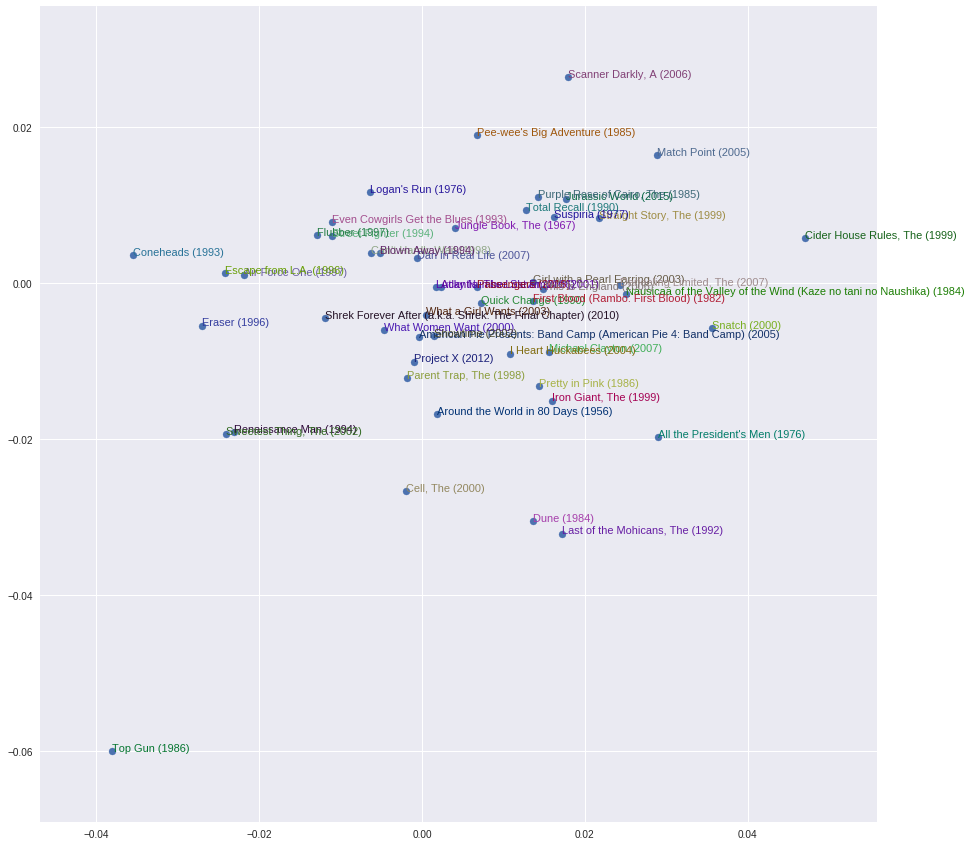

In [0]:
idxs = np.random.choice(len(topMovies), 50, replace=False)
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(topMovies[idxs], X, Y):
    plt.text(x,y,movie_names[i], color=np.random.rand(3)*0.7, fontsize=11)
plt.show()


Collab filtering from scratch¶


In [0]:
a = T([[1.,2],[3,4]])
b = T([[2.,2],[10,10]])
a,b


(
  1  2
  3  4
 [torch.cuda.FloatTensor of size 2x2 (GPU 0)], 
   2   2
  10  10
 [torch.cuda.FloatTensor of size 2x2 (GPU 0)])

In [0]:
a*b


  2   4
 30  40
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

In [0]:
(a*b).sum(1)


  6
 70
[torch.cuda.FloatTensor of size 2 (GPU 0)]

In [0]:
class DotProduct(nn.Module):
    def forward(self, u, m): return (u*m).sum(1)

In [0]:
model=DotProduct()

In [0]:
model(a,b)


  6
 70
[torch.cuda.FloatTensor of size 2 (GPU 0)]

In [0]:
u_uniq = ratings.userId.unique()
user2idx = {o:i for i,o in enumerate(u_uniq)}
ratings.userId = ratings.userId.apply(lambda x: user2idx[x])

m_uniq = ratings.movieId.unique()
movie2idx = {o:i for i,o in enumerate(m_uniq)}
ratings.movieId = ratings.movieId.apply(lambda x: movie2idx[x])

n_users=int(ratings.userId.nunique())
n_movies=int(ratings.movieId.nunique())

In [0]:
class EmbeddingDot(nn.Module):
    def __init__(self, n_users, n_movies):
        super().__init__()
        self.u = nn.Embedding(n_users, n_factors)
        self.m = nn.Embedding(n_movies, n_factors)
        
        self.u.weight.data.uniform_(0,0.05)
        self.m.weight.data.uniform_(0,0.05)
        
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        u,m = self.u(users),self.m(movies)
        return (u*m).sum(1).view(-1, 1)

In [0]:
x = ratings.drop(['rating', 'timestamp'],axis=1)
y = ratings['rating'].astype(np.float32)

In [0]:
data = ColumnarModelData.from_data_frame(path, val_idxs, x, y, ['userId', 'movieId'], 64)

In [0]:
wd=1e-5
model = EmbeddingDot(n_users, n_movies).cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [0]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss   
    0      1.657723   1.594691  
    1      1.071089   1.301543  
    2      0.841388   1.223869  



[array([1.22387])]

In [0]:
set_lrs(opt, 0.01)

In [0]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss   
    0      0.686566   1.151708  
    1      0.636915   1.139928  
    2      0.66947    1.135264  



[array([1.13526])]

In [0]:
min_rating,max_rating = ratings.rating.min(),ratings.rating.max()
min_rating,max_rating

(0.5, 5.0)

In [0]:
def get_emb(ni,nf):
    e = nn.Embedding(ni, nf)
    e.weight.data.uniform_(-0.01,0.01)
    return e

class EmbeddingDotBias(nn.Module):
    def __init__(self, n_users, n_movies):
        super().__init__()
        (self.u, self.m, self.ub, self.mb) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_movies, n_factors), (n_users,1), (n_movies,1)
        ]]
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        um = (self.u(users)* self.m(movies)).sum(1)
        res = um + self.ub(users).squeeze() + self.mb(movies).squeeze()
        res = F.sigmoid(res) * (max_rating-min_rating) + min_rating
        return res.view(-1, 1)

In [0]:
wd=2e-4
model = EmbeddingDotBias(cf.n_users, cf.n_items).cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [0]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss   
    0      0.802192   0.817742  
    1      0.774234   0.79537   
    2      0.757991   0.790186  



[array([0.79019])]

In [0]:
set_lrs(opt, 1e-2)

In [0]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss   
    0      0.692962   0.783862  
    1      0.744614   0.781636  
    2      0.715371   0.780751  



[array([0.78075])]

In [0]:
class EmbeddingNet(nn.Module):
    def __init__(self, n_users, n_movies, nh=10, p1=0.05, p2=0.5):
        super().__init__()
        (self.u, self.m) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_movies, n_factors)]]
        self.lin1 = nn.Linear(n_factors*2, nh)
        self.lin2 = nn.Linear(nh, 1)
        self.drop1 = nn.Dropout(p1)
        self.drop2 = nn.Dropout(p2)
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        x = self.drop1(torch.cat([self.u(users),self.m(movies)], dim=1))
        x = self.drop2(F.relu(self.lin1(x)))
        return F.sigmoid(self.lin2(x)) * (max_rating-min_rating+1) + min_rating-0.5

In [0]:
wd=1e-5
model = EmbeddingNet(n_users, n_movies).cuda()
opt = optim.Adam(model.parameters(), 1e-3, weight_decay=wd)

In [0]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss   
    0      0.795179   0.783902  
    1      0.753456   0.767195  
    2      0.743337   0.767157  



[array([0.76716])]

In [0]:
set_lrs(opt, 1e-3)

In [0]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss   
    0      0.743844   0.769023  
    1      0.715565   0.770451  
    2      0.724298   0.77205   



[array([0.77205])]